In [7]:
backend = 'onnxruntime'
# backend = 'sklearn'
# backend = 'sql_duckdb'
# backend = 'lleaves'
# backend = 'treelite'

model = 'Ailerons_d10_l818_n1635_20241117152319'

if backend == 'onnxruntime':
    result_file = 'result.csv'
else:
    result_file = f'result_{backend}.csv'

In [8]:
import pandas as pd
import numpy as np

df = pd.read_csv(result_file)
df = df[df['model'] == model]
df

,model,pruned,predicate,data,scale,threads,time
914,Ailerons_d10_l818_n1635_20241117152319,0,0.000000,Ailerons,10G,1,6.840210
915,Ailerons_d10_l818_n1635_20241117152319,1,-0.003176,Ailerons,10G,1,4.477315
916,Ailerons_d10_l818_n1635_20241117152319,2,-0.003176,Ailerons,10G,1,4.464371
917,Ailerons_d10_l818_n1635_20241117152319,1,-0.002852,Ailerons,10G,1,4.461235
918,Ailerons_d10_l818_n1635_20241117152319,2,-0.002852,Ailerons,10G,1,4.465622
919,Ailerons_d10_l818_n1635_20241117152319,1,-0.002528,Ailerons,10G,1,4.437665
920,Ailerons_d10_l818_n1635_20241117152319,2,-0.002528,Ailerons,10G,1,4.588625
921,Ailerons_d10_l818_n1635_20241117152319,1,-0.002204,Ailerons,10G,1,4.738167
922,Ailerons_d10_l818_n1635_20241117152319,2,-0.002204,Ailerons,10G,1,4.717858
923,Ailerons_d10_l818_n1635_20241117152319,1,-0.001880,Ailerons,10G,1,5.043557


In [9]:
data = df[df['pruned'] == 0]['data'].values[0]
threads = df[df['pruned'] == 0]['threads'].values[0]
scale = df[df['pruned'] == 0]['scale'].values[0]


base_line = df[df['pruned'] == 0]['time'].values[0]
x = df[df['pruned'] == 1]['predicate'].values
y1 = df[df['pruned'] == 1]['time'].values
y2 = df[df['pruned'] == 2]['time'].values

(0.0, 6.961507902977368)

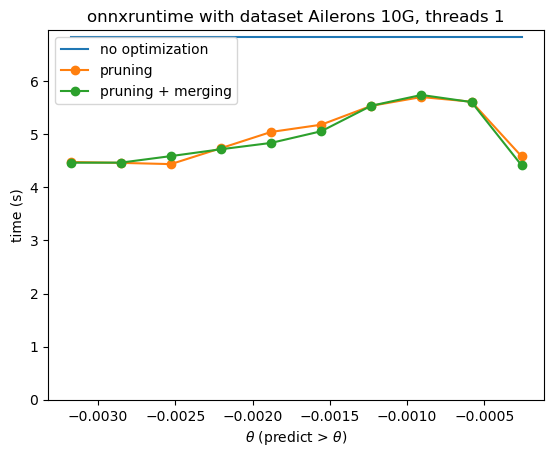

In [10]:
import matplotlib.pyplot as plt

plt.plot(x, [base_line for _ in range(len(x))], label='no optimization')
plt.plot(x, y1, marker='o', label='pruning')
# plt.bar(x, y1, width=0.1, label='pruning')
if len(y2) > 0:
    # x2 = [e + 0.1 for e in x]
    plt.plot(x, y2, marker='o', label='pruning + merging')
    # plt.bar(x2, y2, width=0.1, label='pruning + merging')
plt.title(f'{backend} with dataset {data} {scale}, threads {threads}')
plt.ylabel('time (s)')
plt.xlabel('$\\theta$ (predict > $\\theta$)')
plt.legend()
plt.ylim(0)

(0.0, 7.1822203834424725)

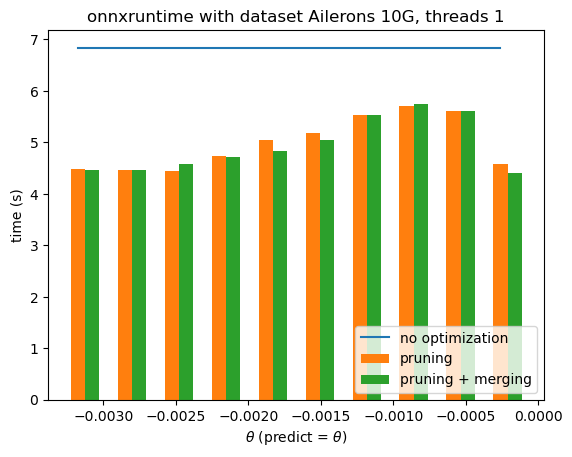

In [11]:
import matplotlib.pyplot as plt

plt.plot(x, [base_line for _ in range(len(x))], label='no optimization', color='tab:blue')
# plt.plot(x, y1, marker='o', label='pruning')
width = (x[-1] - x[0]) / len(x) / 3
plt.bar(x, y1, width=width, label='pruning', color='tab:orange')
if len(y2) > 0:
    x2 = [e + width for e in x]
    # plt.plot(x, y2, marker='o', label='pruning + merging')
    plt.bar(x2, y2, width=width, label='pruning + merging', color='tab:green')
plt.title(f'{backend} with dataset {data} {scale}, threads {threads}')
plt.ylabel('time (s)')
# plt.xlabel('$\\theta$ (predict > $\\theta$)')
plt.xlabel('$\\theta$ (predict = $\\theta$)')
plt.legend(loc='lower right')
plt.ylim(0)

(0.0, 1.5770535241839168)

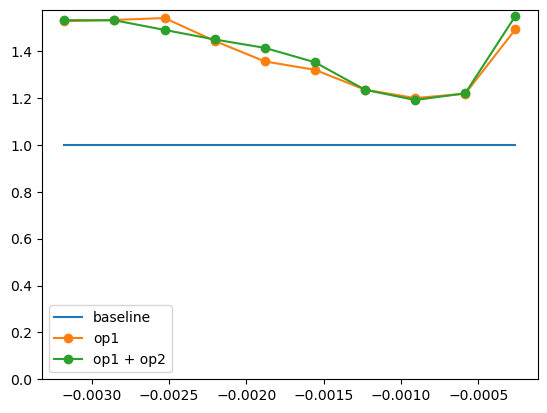

In [12]:
plt.plot(x, [1 for _ in range(len(x))], label='baseline')
plt.plot(x, base_line / y1, marker='o', label='op1')
if len(y2) > 0:
    plt.plot(x, base_line / y2, marker='o', label='op1 + op2')
plt.legend()
plt.ylim(0)